In [102]:
# ASTR 400 B 
# In Class Lab 2

# Import Modules 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.integrate import quad # For integration
# Documentation and examples for quad : 
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html
# https://www.tutorialspoint.com/scipy/scipy_integrate.htm

## Part A:  Schechter Fxn

The galaxy luminosity function in the nearby universe is well described by a Schechter Function:

\begin{equation}
\Phi(M)dM = ( 0.4 \, ln10 ) \, \phi_\ast \, 10^{0.4(M_\ast - M)(\alpha +1)} e^{-10^{0.4(M_\ast - M)}} dM
\end{equation}

With the following parameters from Smith+2009 for Field Galaxies in SDSS at z$\sim$0.1 in the Kband:


 $\phi_\ast$ =1.66 $  \times 10^{-2}$  $h^3$ Mpc$^{-3}$

 $\alpha$ =  -0.81 


  M$_\ast$ =  M$_k^\ast$= -23.19  - 5*log($h$)
  
 $h$ = the Hubble constant in units of 100 km/s/Mpc . At z=0 this is 0.7. But we are going to se $h$=1 here. Units will then be in "comoving" coordinates.
  
  This function is defined for you below:

In [103]:
def schechter_M(m,phi_star=0.0166,m_star=-23.19,alpha=-0.81):
    """ Function that computes the Schechter Luminosity Function for a given magnitude, 
    assuming default parameters for field galaxies in SDSS at z~0.1 in the Kband (Smith+2009)
    
    Inputs
        m : an array of floats
            an array of Kband magnitudes  (assumes -5*log(h) implicitly)
        phi_star:  float
            normalization of Schechter fxn (h^3 Mpc^-3)
        m_star:  float 
            knee of the Schechter fxn (K-band magnitude, assumes -5*log(h) implicitly)
        alpha:  float
            faint end slope of the Schechter fxn
    
    Output:
        schechterM: float
            number density of galaxies (comoving units) at the given magnitude m - 5*log(h)
            

    """

# You should divide up long functions instead of writing them out as one long set
    a = 0.4*np.log(10)*phi_star # Grouping all constants together
    b = 10**(0.4*(m_star-m)*(alpha+1.0)) # The Power Law, controlling the faint end slope
    c = np.exp(-10**(0.4*(m_star-m))) # The Exponential controlling the high mass end behavior
    schechterM = a*b*c # schechter function for the given magnitude
# i.e. don't do the below
#    return 0.4*np.log(10)*phistar*10**(0.4*(Mstar - M)*(alpha +1.0))*np.exp(-10**(0.4*(Mstar - M)))

    return schechterM

# Q1 

Utilizing the defined function, plot the Schechter Function using the above parameter values over a magnitude range of -17 to -26. 
Try to reproduce the black solid line in Smith+2009 MNRAS 397,868 [UKIDSS Survey] Figure below.


![Smith](./Smith09.png)

# Q2 

Galaxies in the Virgo Cluster have different parameters, like $\alpha$=-1.35  (Ferrarese+2016 ApJ 824).

Overplot the Schechter Function with this new value of $\alpha$.  

Try a smaller value of $\alpha = -0.6$.

How does the function change?  What does this mean? 


In [104]:
# Create an array to store Kband Magnitudes from -26 to -17
m = np.arange(-26,-16.9,0.1)

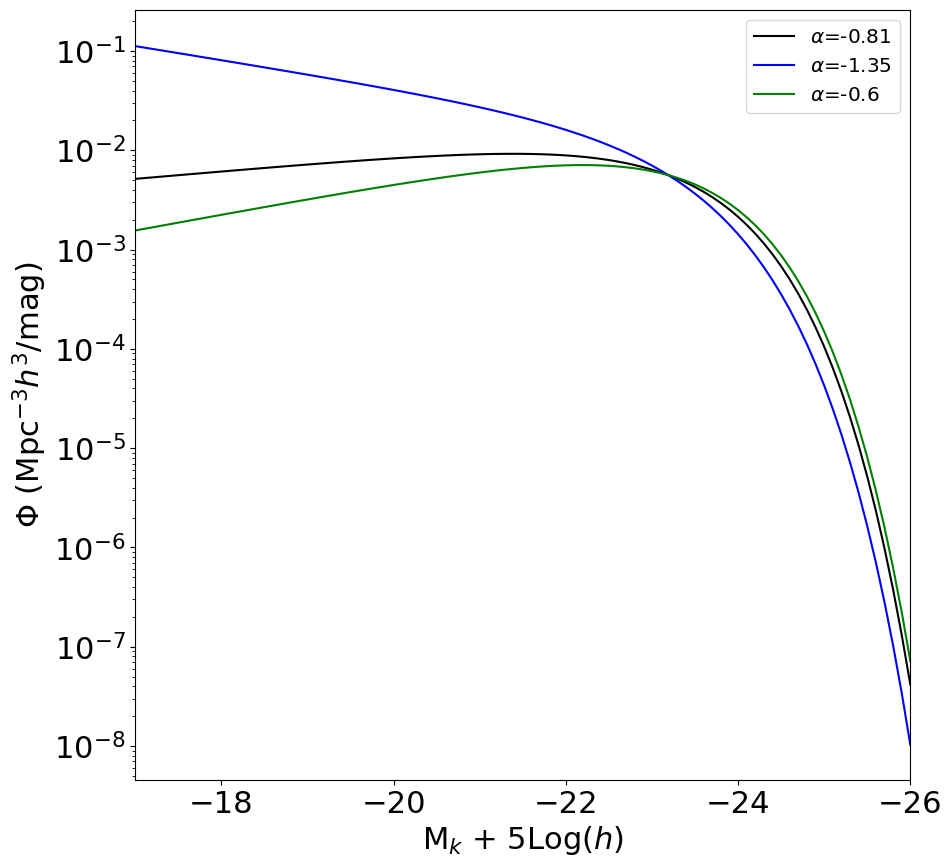

In [105]:
# Plot the Schechter Function

fig = plt.figure(figsize=(10,10))  # sets the scale of the figure
ax = plt.subplot(111) 

# Plot the default values (y axis log)
# ADD HERE
#Plotting the Schechter function as defined in Smith+2009:
ax.plot(m, schechter_M(m), 'k', label=r"$\alpha$=-0.81")  # Plotting and labeling the Schechter function   
plt.semilogy()                                            # Changing the y-axis to logarithmic scale

# Q2 solutions: change alpha
# ADD HERE
# Plotting the Schechter function for the Virgo Cluster according to Ferrarese+2016: 
ax.plot(m, schechter_M(m,alpha=-1.35), 'b', label=r"$\alpha$=-1.35")  

# Plotting the Schechter function for alpha=-0.6:
ax.plot(m, schechter_M(m,alpha=-0.6), 'g', label=r"$\alpha$=-0.6")       

# Add labels
plt.xlabel(r'M$_k$ + 5Log($h$)', fontsize=22)
plt.ylabel(r'$\Phi$ (Mpc$^{-3}h^3$/mag)', fontsize=22)

#set axis limits
plt.xlim(-17,-26)

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

# add a legend with some customizations.
legend = ax.legend(loc='upper right',fontsize='x-large')

# Save to a file
plt.savefig('Schechter_M.png')

In [106]:
print(r"For the Virgo Cluster, i.e. $\alpha$=-1.35, the slope of the Schechter function at higher magnitudes becomes lessser.")
print(r"For $\alpha$=-0.6, the slope of the Schechter function at higher magnitudes becomes higher.")
print(r"Thus, alpha is the slope of the Schecter function at higher magnitudes, i.e. lower luminosity or fainter, end.")

For the Virgo Cluster, i.e. $\alpha$=-1.35, the slope of the Schechter function at higher magnitudes becomes lessser.
For $\alpha$=-0.6, the slope of the Schechter function at higher magnitudes becomes higher.
Thus, alpha is the slope of the Schecter function at higher magnitudes, i.e. lower luminosity or fainter, end.


# Q3

Build a function to compute the Schechter Function in terms of luminosity.

Use `quad` to numerically integrate the function to compute the fraction of the luminosity that lies above L* in the following three cases:  

$\alpha$=-0.7 (default), $\alpha$=-0.6, $\alpha$=1.85. 


Schecheter Function $\Phi(L) = \frac{n_\ast}{L_\ast} (\frac{L}{L_\ast})  ^{\alpha}  e^{-L/L_\ast}$

$n_\ast$ = 0.008  $h^3$ Mpc$^{-3}$

$L_\star = 1.4 \times 10^{10} L_\odot$

In [107]:
# Defining the Schechter Function in terms of luminosity:
def schechter_L(L,n_star=0.008,L_star=1.4e+10,alpha=-0.7):
    """ Function that computes the Schechter Luminosity Function for a given luminosity.
    
    Inputs
        L : an array of floats
            an array of luminosities (L_sun)
        n_star:  float
            normalization density of Schechter fxn (h^3 Mpc^-3),
            default is 0.008 h^3 Mpc^-3
        L_star:  float 
            characteristic luminosity (L_sun),
            default is 1.4e+10 L_sun
        alpha:  float
            power law slope at low L,
            default is -0.7
    
    Output:
        schechterL: float
            number density of galaxies at the given luminosity
    """
    
    a = n_star/L_star
    b = (L/L_star)**alpha
    c = np.exp(-L/L_star)
    
    schechterL = a*b*c     # Calculating the Schechter luminosity function
    
    return schechterL

In [108]:
# Understanding lambda functions
# Short cut -- defines and evaluates a function in one line ! 

# lambda says that a function follows, where the variables are a and b, and the function to be evaluated is a*b
x = lambda a, b : a * b
print(x(5, 6))

30


In [109]:
# Example Usage of quad and lambda

print(quad(np.sin, 0, np.pi))


f = lambda x: np.sin(x)
print(quad(f, 0, np.pi))
# first element quad is the integral, second element is the error


def ex(x):
    return np.sin(x) 

print(quad(lambda x: ex(x), 0, np.pi))

(2.0, 2.220446049250313e-14)
(2.0, 2.220446049250313e-14)
(2.0, 2.220446049250313e-14)


In [110]:
# The fraction of luminosity above L_star is foor alpha=-0.7:
f = lambda x: x*schechter_L(x)
print(quad(f, 1.4e+10, np.inf))

(-0.002943035529409571, 8.52065813738978e-14)


C:\Users\ual-laptop\AppData\Local\Temp\ipykernel_21636\3351123515.py:3: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  print(quad(f, 1.4e+10, np.inf))


In [111]:
# The fraction of luminosity above L_star is foor alpha=-0.6:
f = lambda x: x*schechter_L(x,alpha=-0.6)
print(quad(f, 1.4e+10, np.inf))

(-0.002943035529528154, 3.110085973478949e-13)


C:\Users\ual-laptop\AppData\Local\Temp\ipykernel_21636\1963559032.py:3: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  print(quad(f, 1.4e+10, np.inf))


In [112]:
# The fraction of luminosity above L_star is foor alpha=1.85:
f = lambda x: x*schechter_L(x,alpha=1.85)
print(quad(f, 1.4e+10, np.inf))

(-0.0029430355294129103, 7.983219120488716e-13)


C:\Users\ual-laptop\AppData\Local\Temp\ipykernel_21636\1597722786.py:3: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  print(quad(f, 1.4e+10, np.inf))


## Part B: IMF 

Create a function called `Salpeter` that defines the Salpeter IMF: 

\begin{equation}
\xi(M) = \xi_0 (M/M_\odot)^{-\alpha}
\end{equation}

$\alpha = 2.35$
The function should take as input an array of stellar masses, M. 
You will need to determine the normalization, $\xi_0$, by integrating this equation over mass from 0.1 to 120 M$_\odot$
and setting the value to 1.  The function should then return $\xi(M)$, which will now represent the fractional number of stars. 

Integration:

`quad(lambda x:  fxn(x),xmin,xmax)`

quad returns an array with 2 values. you want the first value. 
Note I've used a "lambda" expression.   Python's lambda expressions allow a function to be created and passed around all in one line of code

In [119]:
def Salpeter(M, imf_0 = 0.06030648706907299, alpha=2.35):
    """This function defines the Salpeter IMF.
    
    Parameters
    ----------
    M: numpy.array
        An array of stellar masses in M_Sun.
    
    imf_0: float
        The normalization factor imf_0.
        Default is 0.06030648706907299.
    
    alpha: float
        Slope of power law in Salpeter IMF.
        Default is 2.35.
    
    Returns
    -------
    imf: numpy.array
        An array of the fractional no. of stars using the Salpeter IMF given the stellar masses.
    """
    
    imf = imf_0 * M**(-alpha)
    
    return imf

In [120]:
#y, yerr = quad(lambda x: Salpeter(x),0.1,120)
#imf_0 = 1/y

## Q1: 
Double Check: if you integrate your function from 0.1 to 120 you should return 1.0 


In [122]:
# Integrating Salpeter IMF from 0.1 M_Sun to 120 M_Sun:
y, yerr = quad(lambda x: Salpeter(x),0.1,120)
y

1.0000000000000002

## Q2: 
Integrate your normalized function to compute the fraction of stars with stellar masses greater than the sun and less 
than 120 M$_\odot$.

In [146]:
# Computing the fraction of stars with stellar masses greater than the Sun and less than 120 M_Sun:
y, yerr = quad(lambda x: Salpeter(x),1,120)
y

0.04460178750055925

## Q3:

How might you modify the above to return the fraction of MASS ? instead of fraction of the total numbers of stars.

In [147]:
print("To return the fraction of mass instead of fraction of the total numbers of stars, we integrate the Salpeter IMF \
multiplied by  the stellar mass.")

To return the fraction of mass instead of fraction of the total numbers of stars, we integrate the Salpeter IMF multiplied by  the stellar mass.


In [153]:
y, yerr = quad(lambda x: x*Salpeter(x),1,120)
print(f'The fraction of stellar mass more massive than the Sun is {y:.2f}.')

The fraction of stellar mass more massive than the Sun is 0.14.
